# EXPLORATORY DATA ANALYSIS

In [1]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from pprint import pprint
import seaborn as sns
import pandas as pd
import numpy as np
import langdetect
import requests
import chardet
% matplotlib inline

## LOAD DATA

In [2]:
df = pd.read_csv('data/161207_ZikaLabels.csv')
df.head(6)

,locale,diagnosisRAW,diagnosisCODED,zika
0,pt_BR,estava somente gripado,Influenza,False
1,pt_BR,"Me passou rem�dios para enchaqueca , soro e o ...",Other,False
2,pt_BR,repouso e tomar agua e o remedio nimesulida!!,Other,False
3,pt_BR,yes,Other,False
4,pt_BR,60%,Other,False
5,pt_BR,Hiniti,Other,False


In [3]:
df.shape

(7125, 4)

## CHECK NaNs

In [4]:
df.isnull().sum()

locale             0
diagnosisRAW      71
diagnosisCODED    71
zika               0
dtype: int64

## CHECK locale & diagnosisCODED

In [5]:
print df.locale.value_counts()
print '#'*35
print df.diagnosisCODED.value_counts()

pt_BR    7054
es_LA      46
en_US      20
fr_FR       5
Name: locale, dtype: int64
###################################
Other            4777
Influenza         597
Zika              478
Virus disease     383
Migraine          304
Dengue            271
Sinusitis         113
Common cold        97
Chikungunya        34
Name: diagnosisCODED, dtype: int64


## CHECK CLASS BALANCE

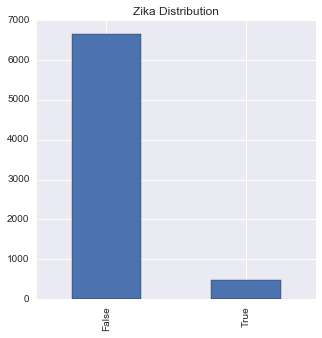

In [6]:
plt.figure(figsize=(5,5))
df.zika.value_counts().plot(kind='bar',title='Zika Distribution')
plt.show()

## CHECK ENCODING

3 different encodings detected.

Note to self: check to see if there are multiple languages

In [7]:
encoding_count = {}
for text in df.diagnosisRAW:
    try:
        encoding = chardet.detect(text)['encoding']
        if encoding in encoding_count.keys():
            encoding_count[encoding] += 1
        else:
            encoding_count[encoding] = 1
    except:
        pass

In [8]:
pprint(encoding_count)

{None: 2, 'ISO-8859-2': 1933, 'ascii': 4814, 'windows-1252': 305}


## CHECK LANGUAGES

29 different languages detected!

In [9]:
# webscrap for language abbreviations
URL = 'http://www.lingoes.net/en/translator/langcode.htm'
response = requests.get(URL)
soup = BeautifulSoup(response.text,'lxml')
html_tag = 'td' #tags include, but not limited to ['table','tbody','td','tr']
html_text = soup.findAll(html_tag)
lang_table = [website_info.text.encode('utf-8') for website_info in html_text]
lang_abbrevs = np.array(lang_table).reshape(len(lang_table)/2,2) #view data
lang_dict = {}
for row in range(1,lang_abbrevs.shape[0]):
    key = lang_abbrevs[row,0]
    val = lang_abbrevs[row,1]
    lang_dict[key] = val

In [14]:
# frequency of languages utilized
lang_count = {}
for text in df.diagnosisRAW:
    try: 
        lang = langdetect.detect(text.decode('ISO-8859-2').encode('ASCII','ignore'))
        lang = lang.encode('ASCII')
        key = lang_dict[lang]
        if key in lang_count.keys():
            lang_count[key]+=1
        else:
            lang_count[key]=1
    except:
        pass

In [15]:
pprint(lang_count)

{'Afrikaans': 55,
 'Albanian': 321,
 'Catalan': 345,
 'Croatian': 99,
 'Czech': 5,
 'Danish': 10,
 'Dutch': 51,
 'English': 199,
 'Estonian': 110,
 'Finnish': 91,
 'French': 326,
 'German': 195,
 'Hungarian': 4,
 'Indonesian': 109,
 'Italian': 263,
 'Latvian': 74,
 'Lithuanian': 267,
 'Polish': 14,
 'Portuguese': 2925,
 'Romanian': 253,
 'Slovak': 29,
 'Slovenian': 74,
 'Spanish': 272,
 'Swahili': 180,
 'Swedish': 7,
 'Tagalog': 110,
 'Turkish': 65,
 'Vietnamese': 104,
 'Welsh': 11}
